In [331]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams['axes.grid'] = False
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})


In [332]:
import gzip
import datetime
import sys
import pandas as pd
import os
import mpld3


files = []
for filename in os.listdir(sys.path[0]):
    if filename.endswith("GlicemiaMisurazioni.csv.gz"):
         files.append({'Name': filename.split(".")[0], 'Path': os.path.join(sys.path[0], filename)})

if len(files)==0:
    print("File not found")

for file in files:
    file1 = gzip.open(file["Path"], 'rt',  encoding='utf-16-le')
    Lines = file1.readlines()

    extract = []
    for line in Lines:
        if len(line)==2:
            continue
        x = line.split(";")
        try:
            extract.append({'Datetime': datetime.datetime.strptime(x[1], "%d/%m/%Y %H.%M.%S"), 'Number': int(x[6])})
        except:
            print(x[6])
    extract = pd.DataFrame(extract)
    filename = f'{file["Name"]}'
extract["Datetime"] = pd.to_datetime(extract["Datetime"])

In [333]:
extract.set_index("Datetime", inplace=True)
extract.index = pd.MultiIndex.from_arrays([extract.index.date, extract.index.time], names=['Date','Time'])


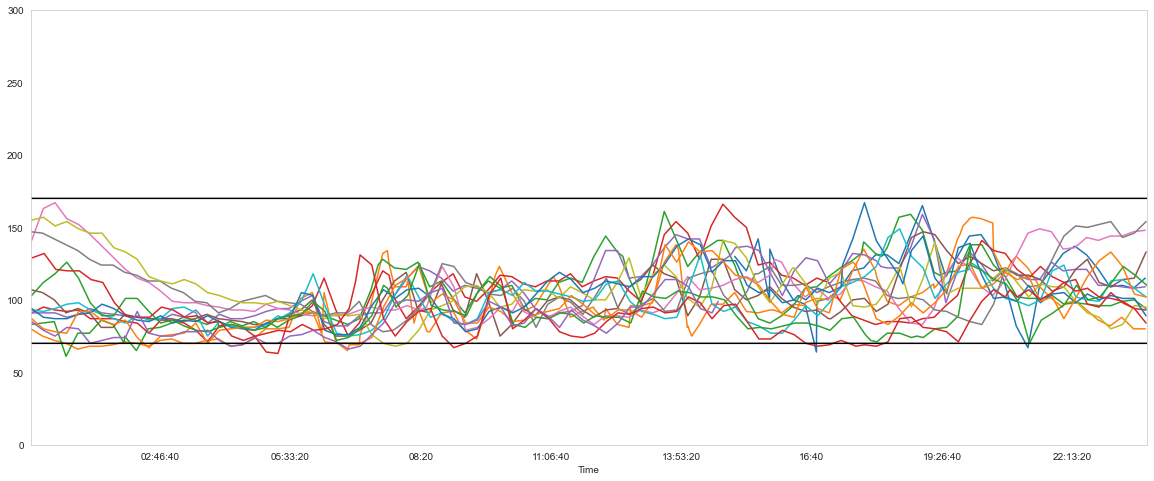

In [334]:
fig1 = plt.figure()
i=0
for column in extract.unstack(level=0)["Number"].columns:
    if i==0:
        ax1 = extract.unstack(level=0)["Number"][column].dropna().plot()
    else:
        extract.unstack(level=0)["Number"][column].dropna().plot()
    i = i + 1
a = list(pd.date_range(str(extract.unstack(level=0)["Number"].index.min()), str(extract.unstack(level=0)["Number"].index.max()), freq="1min").time)
ax1.plot(a,[170]*len(a),color='black')
ax1.plot(a,[70]*len(a),color='black')
plt.xlim(extract.unstack(level=0)["Number"].index.min(), extract.unstack(level=0)["Number"].index.max())
plt.ylim(0, 300)
graph1 = mpld3.fig_to_html(fig1)

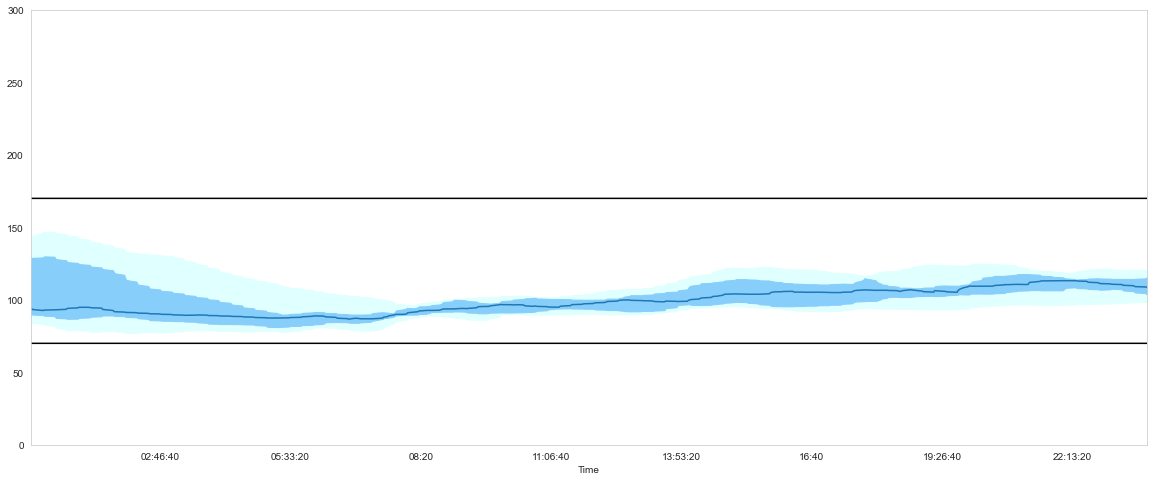

In [335]:
fig2 = plt.figure()
percentiles = extract.unstack(level=0)["Number"].interpolate(method ='linear', limit_direction ='backward').interpolate(method ='linear', limit_direction ='forward').ewm(span=100).mean()#.dropna()#.window(3).mean()
percentiles["Median"] = percentiles.quantile(0.5,axis=1)
percentiles["25Percentile"] = percentiles.quantile(0.25,axis=1)
percentiles["75Percentile"] = percentiles.quantile(0.75,axis=1)
percentiles["10Percentile"] = percentiles.quantile(0.1,axis=1)
percentiles["90Percentile"] = percentiles.quantile(0.9,axis=1)
ax2 = percentiles["Median"].plot()
ax2.fill_between(percentiles.index,percentiles["10Percentile"], percentiles["90Percentile"], color='lightcyan')
ax2.fill_between(percentiles.index,percentiles["25Percentile"], percentiles["75Percentile"], color='lightskyblue')
a = list(pd.date_range(str(extract.unstack(level=0)["Number"].index.min()), str(extract.unstack(level=0)["Number"].index.max()), freq="1min").time)
ax2.plot(a,[170]*len(a),color='black')
ax2.plot(a,[70]*len(a),color='black')
plt.xlim(extract.unstack(level=0)["Number"].index.min(), extract.unstack(level=0)["Number"].index.max())
plt.ylim(0, 300)
plt.show()
graph2 = mpld3.fig_to_html(fig2)

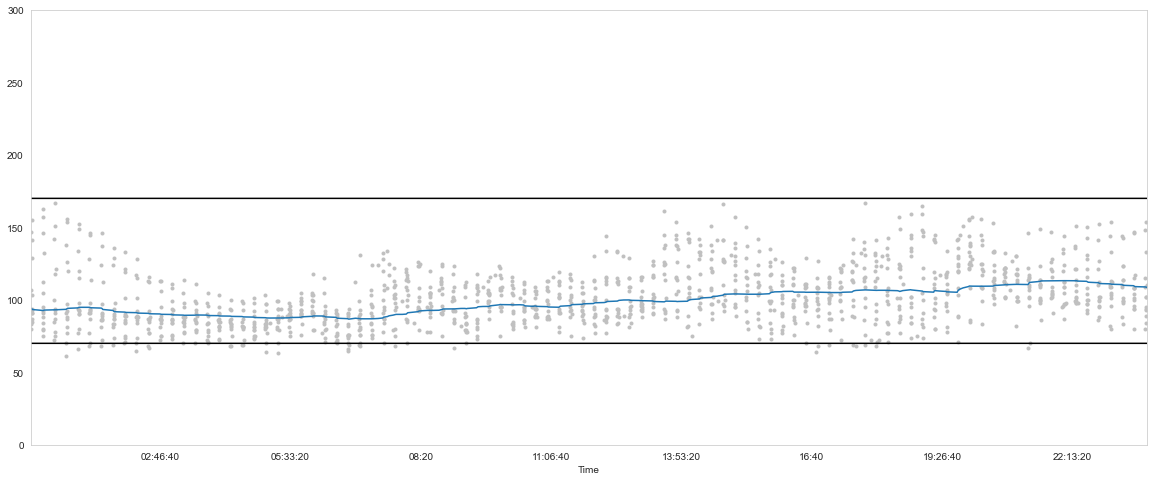

In [336]:
fig4 = plt.figure()
i = 0
for column in extract.unstack(level=0)["Number"].columns:
    if i==0:
        ax = extract.unstack(level=0)["Number"][column].dropna().plot(color="silver",style=".")
    else:
        extract.unstack(level=0)["Number"][column].dropna().plot(color="silver",style=".")
percentiles["Median"].plot()
a = list(pd.date_range(str(extract.unstack(level=0)["Number"].index.min()), str(extract.unstack(level=0)["Number"].index.max()), freq="1min").time)
ax.plot(a,[170]*len(a),color='black')
ax.plot(a,[70]*len(a),color='black')
plt.xlim(extract.unstack(level=0)["Number"].index.min(), extract.unstack(level=0)["Number"].index.max())
plt.ylim(0, 300)
plt.show()
graph4 = mpld3.fig_to_html(fig4)

In [337]:
html = extract.to_html()

# write html to file
text_file = open(f"{filename}.html", "w")
text_file.write(graph1)
text_file.write(graph2)
text_file.write(graph4)
text_file.write(html)
text_file.close()

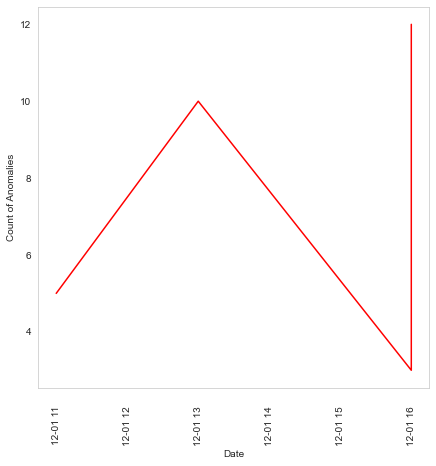

In [338]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage
import numpy as np
import pandas as pd
import datetime

fig, ax = plt.subplots()
dsize = fig.get_size_inches()

fig.set_size_inches(7,7)

data=pd.DataFrame(
    [
        ['2017-12-01 11:55:01',5],
        ['2017-12-01 13:55:03',10],
        ['2017-12-01 16:55:01',3],
        ['2017-12-01 16:55:01',12]
    ], columns=['timestamp','count']
)

tt=data['timestamp'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
tt1=tt.apply(lambda x: datetime.datetime(x.year,x.month,x.day,x.hour))
x=[i for k,i in enumerate(tt1)]
y=[i for k, i in enumerate(data['count'])]
ax.minorticks_off()
ax.tick_params(axis='x', which='major', pad=15)
plt.xticks(rotation=90)
line, = ax.plot(x,y)
ax.set_xlabel('Date')
ax.set_ylabel('Count of Anomalies')
line.set_color("Red")

plt.show()

